- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [104]:
# On importe notre boîte à outils !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [105]:
# On importe notre base de donnée

data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

# 1) Séparation des variables quantitatives/catégorielles

In [106]:
# On extrait les variables quantitatives dans une variables var
var = data1.iloc[:,2:9]

# On extrait la variable categorielle dans une variables categorielle
categorielle = data1.iloc[:,0:1]

In [107]:
# On affiche les 5 premières lignes de var

var.head(5)

mois   prot    fat   ash  sodium  carb   cal
0  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4  30.49  21.28  41.65  4.82    1.64  1.76  4.67

In [108]:
# On affiche les 5 premières lignes de categorielle

categorielle.head(5)

brand
0     A
1     A
2     A
3     A
4     A

# 2) ACP

In [109]:
# On centre-réduit les variables quantitatives

x = var.values
x = StandardScaler().fit_transform(x)

In [110]:
x

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [111]:
# Instanciation pour l'ACP
acp = sklearnPCA(svd_solver='full')
coord = acp.fit_transform(x)

# Nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

7


On a bien __7 composantes calculées__

In [112]:
# On calcule les valeurs propres

variance = acp.explained_variance_
eigval = variance*(len(x)-1)/len(x)
print(eigval)

[4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878034e-06]


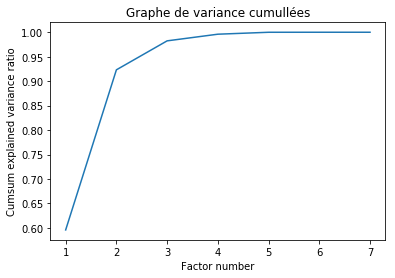

In [113]:
# On affiche le cumul de variance expliquée

plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Graphe de variance cumullées")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

On utilise le critère du __coude__  
On choisit de garder les <font color='red'>2 première composantes</font>  

# 3) Représentation ACP

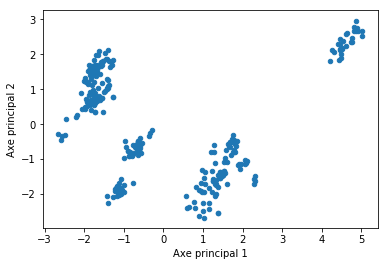

In [114]:
# On effectue une ACP sur ces valeurs

pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
finaldf = pd.concat([principaldf, data1.iloc[:,0:1]], axis = 1)
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [115]:
# On détermine le nombre de marques de Pizza :

data1.brand.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

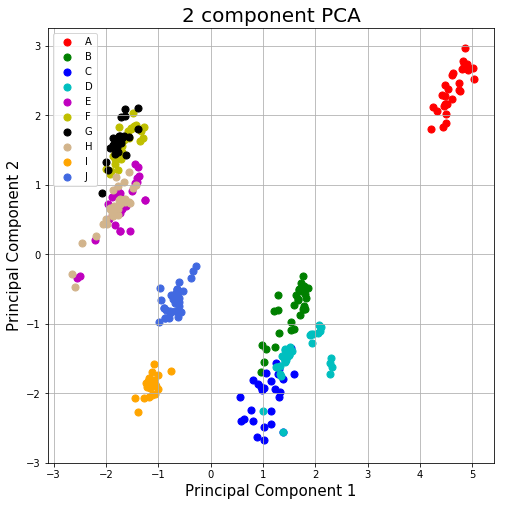

In [116]:
# On implante une couleur pour chaque marque dans l'ACP

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan', 'orange', 'royalblue']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['brand'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

On veille à ne pas oublier d'afficher la légende

In [117]:
# Contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)

# Qualité de représentation des individus avec le test de Cos^2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data1.id,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

        id    COS2_1    COS2_2
0    14069  0.775166  0.221654
1    14053  0.793240  0.201070
2    14025  0.763141  0.236246
3    14016  0.791285  0.206819
4    14005  0.807292  0.188198
5    14075  0.809216  0.187422
6    14082  0.812318  0.184578
7    14097  0.794864  0.194423
8    14117  0.765258  0.233433
9    14133  0.773565  0.226193
10   14101  0.756748  0.241828
11   14108  0.760368  0.239033
12   14164  0.760472  0.237973
13   14154  0.784961  0.210871
14   24005  0.812924  0.185352
15   24026  0.776918  0.209289
16   24094  0.841775  0.142414
17   24108  0.828656  0.152307
18   24102  0.842563  0.148214
19   24082  0.801259  0.188545
20   34017  0.726831  0.271077
21   34020  0.748778  0.250015
22   24136  0.812044  0.185997
23   24122  0.795698  0.198451
24   24115  0.816775  0.165006
25   34012  0.782608  0.214938
26   34006  0.757397  0.240218
27   24146  0.768395  0.227940
28   24138  0.800002  0.197615
29   14015  0.711744  0.048507
..     ...       ...       ...
270  140

Il y a une bonne représentation lorsque les Cos^2 tendent vers 1. Ici, la représentation est plutôt bonne.

In [118]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((7,7))
for k in range(7):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables avec facteurs
print(corvar)

[[ 1.32168508e-01 -9.50848850e-01 -2.71497942e-01 -6.80933161e-02
  -1.07642463e-03  8.20313706e-03  1.29139098e-03]
 [ 7.73616888e-01 -4.08180979e-01  4.80341077e-01 -3.26803560e-03
  -6.45464124e-02 -3.15153954e-06  8.53888687e-04]
 [ 9.12312469e-01  3.54715333e-01 -1.28327937e-01 -1.56424131e-01
   2.88421527e-02 -9.65383064e-03  1.16521186e-03]
 [ 9.63831544e-01 -1.67975751e-01  3.62320221e-02  1.70416723e-01
   1.11611305e-01  1.08151947e-03  1.72840141e-04]
 [ 8.89920550e-01  3.05199930e-01 -2.93067379e-01  1.37677851e-01
  -1.00253357e-01  5.75291885e-05 -1.61767114e-06]
 [-8.67883723e-01  4.84768536e-01  3.36332661e-02  1.03144801e-01
   1.23723308e-03 -9.34975052e-06  2.39436513e-03]
 [ 4.99363860e-01  8.58804861e-01  7.29599592e-02 -8.61535778e-02
   1.29769290e-02  1.32645528e-02  3.72075533e-05]]


Les valuers sont proches de 0.

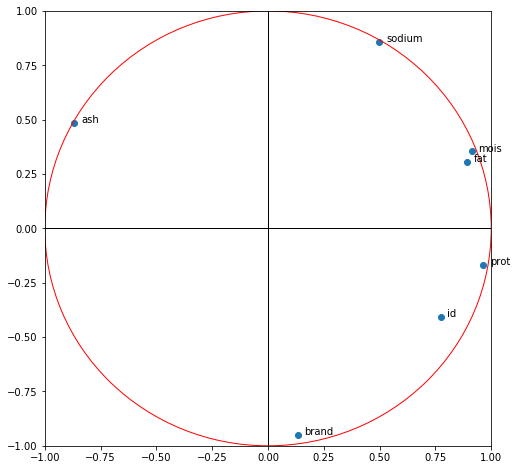

In [119]:
# Cercle des corrélations pour les deux premiers axes

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#points
plt.scatter(corvar[:,0],corvar[:,1])

#on affiche les étiquettes
for j in range(7):
     plt.annotate(data1.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#on ajoute les axes
plt.plot([-1,1],[0,0],color='k',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='k',linestyle='-',linewidth=1)

#on affiche le cercle
cercle = plt.Circle((0,0),1,color='red',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

Les variables sont vraiment <font color='red'>bien représentées</font> car elles sont très __proches du cercle de correlation__.  
Les axes choisis sont adéquat pour la représentation.

# 4) CAH, dendogramme

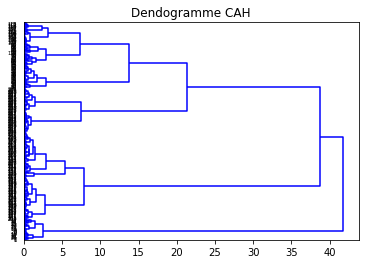

In [120]:
# On génére la matrice des liens

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(x,method='ward',metric='euclidean')

# On affiche le dendrogramme

plt.title("Dendogramme CAH")
dendrogram(Z,orientation='right',color_threshold=0)
plt.show()

On distingue <font color='red'>4 classes</font> plutôt marquées  
On va choir de couper à __15__

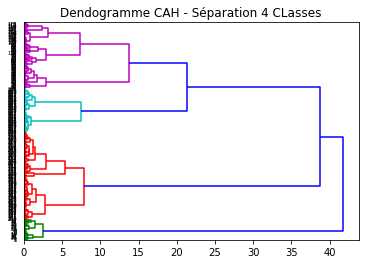

In [121]:
plt.title("Dendogramme CAH - Séparation 4 CLasses")
dendrogram(Z,orientation='right',color_threshold=15)
plt.show()

# 5) K-Means

In [122]:
# On découpage pour obtenir 4 groupes

groupes_cah = fcluster(Z,t=15,criterion='distance')
print(groupes_cah)

# Index triés des groupes

idg = np.argsort(groupes_cah)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


In [123]:
# K-Means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(x)

# Index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

# Distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(x),index = data1.id)
print(dist_data)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]
              0         1         2         3
id                                           
14069  6.942621  5.455676  0.532855  7.119684
14053  6.930667  5.364695  0.517307  7.048537
14025  6.736191  5.307404  0.432470  6.942152
14016  6.331090  4.803225  0.234600  6.444723
14005  6.313784  4.712674  0.361064  6.392697
14075  6.349777  4.745471  0.256101  6.406929
14082  6.139924  4.528

In [124]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0    0   1   2   3
row_0                 
1        0   0  29   0
2      120   0   0   0
3        0   0   0  61
4        0  90   0   0

# 6)

In [125]:
#correspondance avec le regroupement des marques et le regroupement des K-Mean

pd.crosstab(data1.brand,kmeans.labels_)

col_0   0   1   2   3
brand                
A       0   0  29   0
B       0  31   0   0
C       0  27   0   0
D       0  32   0   0
E      28   0   0   0
F      30   0   0   0
G      29   0   0   0
H      33   0   0   0
I       0   0   0  29
J       0   0   0  32

Les pizza appartenant à la même marque sont regroupées dans une même classe.
La classification est bonne.

# 7) On exclut A

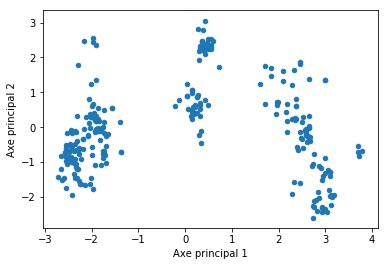

In [126]:
# On enleve la marque A
data2 = data1[data1.brand != 'A']

# On stock dans une variables les données quantitatives
var = data2.iloc[:,2:9]

# On stock dans une variables les données categorielles
categorielle = data2.iloc[:,0:1]
categorielle.head(2)

# On centre et réduit les valeurs quantitatives
x = var.values
x = StandardScaler().fit_transform(x)
x

# On effectue une ACP sur ces valeurs
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
finaldf = pd.concat([principaldf, data1.iloc[:,0:1]], axis = 1)
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

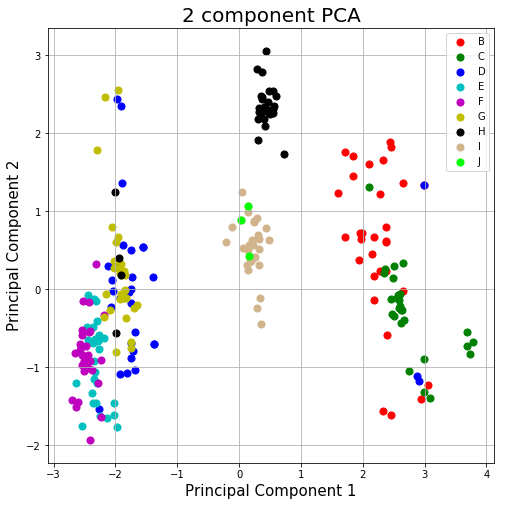

In [127]:
# Visualisation de la matrice
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan', 'lime']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['brand'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Grâce à l'exclusion de A, on se concentre sur les reste des individus, alors plus dispersés et donc différentiables.

# Partie 2

In [128]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [129]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

In [130]:
# On choisit notre modèle de creation

model = tf.keras.models.Sequential()

In [131]:
# On paramètre, avec les nombres de neuronnes, et les modèles

model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="softmax"))

In [132]:
# On test une sortie

model_output = model.predict(np.array(data2[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", data2.RESULTAT[0])

[[1.0000000e+00 3.2228324e-09 1.4005574e-26 0.0000000e+00]]
Found :  0
Should be :  1


In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  40        
_________________________________________________________________
dense_5 (Dense)              multiple                  20        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [134]:
# On compile le modèle
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)

In [135]:
# On entraîne les données
history = model.fit(data2, data2.RESULTAT, epochs=10, validation_split=0.2)

Train on 614 samples, validate on 154 samples
Epoch 1/10
614/614 [==============================] - 0s 561us/sample - loss: 6.2900 - acc: 0.5770 - val_loss: 6.1992 - val_acc: 0.5714
Epoch 2/10
614/614 [==============================] - 0s 121us/sample - loss: 5.8607 - acc: 0.5770 - val_loss: 5.5805 - val_acc: 0.5714
Epoch 3/10
614/614 [==============================] - 0s 167us/sample - loss: 5.4211 - acc: 0.5770 - val_loss: 5.2505 - val_acc: 0.5714
Epoch 4/10
614/614 [==============================] - 0s 175us/sample - loss: 5.2272 - acc: 0.5765 - val_loss: 5.1319 - val_acc: 0.5714
Epoch 5/10
614/614 [==============================] - 0s 160us/sample - loss: 5.0749 - acc: 0.5770 - val_loss: 4.9940 - val_acc: 0.5714
Epoch 6/10
614/614 [==============================] - 0s 168us/sample - loss: 4.7290 - acc: 0.5774 - val_loss: 4.4268 - val_acc: 0.5714
Epoch 7/10
614/614 [==============================] - 0s 164us/sample - loss: 4.0261 - acc: 0.5786 - val_loss: 3.6306 - val_acc: 0.5731
Ep

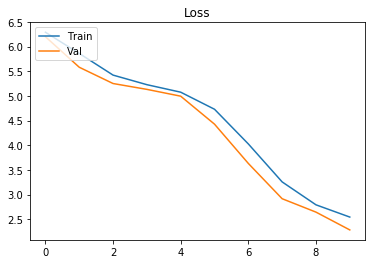

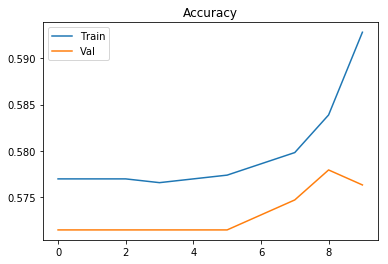

In [136]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [137]:
loss, acc = model.evaluate(data2, data2.RESULTAT)
print("Test Loss", loss)
print("Test Accuracy", acc)

768/768 [==============================] - 0s 29us/sample - loss: 2.3445 - acc: 0.5954
Test Loss 2.344500740369161
Test Accuracy 0.5953776


### Utiliser ce modèle et comparer

In [7]:
# Model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)